# Multiple Movements

Let's see how our robot responds to moving multiple times without sensing!

<img src='images/uncertain_motion.png' width=50% height=50% />


First let's include our usual resource imports and display function.

In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


### QUIZ: Write code that moves 1000 times and then prints the resulting probability distribution.

You are given the initial variables and a complete `move` function (that incorporates uncertainty), below.

[0, 1, 0, 0, 0]


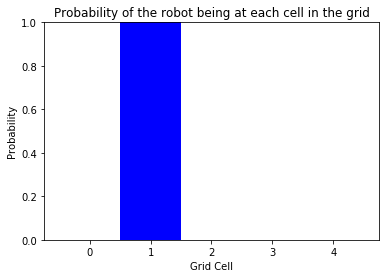

In [3]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# Complete the move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q

# Here is code for moving twice
#p = move(p, 1)
#p = move(p, 1)
print(p)
display_map(p)

[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


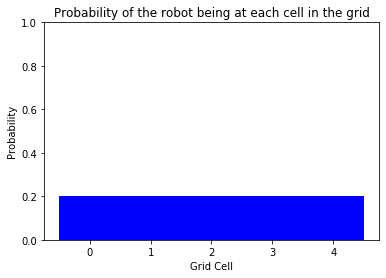

In [4]:
## TODO: Write code for moving 1000 times
for i in range(1000):
    p = move(p, 1)
print(p)
display_map(p)